# Graph Non Isomorphism Interactive Protocol
First of all, we fix a random seed, and some sizes for the graphs in question

In [35]:
V = 10
E = 10
generate_isomorphic = True

We generate two graph, and check that they are not isomorphic (even tough we would need to be really unlucky for them to be)

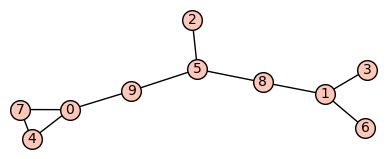

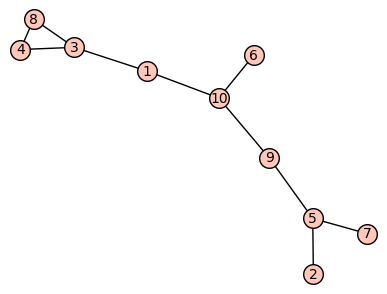

In [36]:
if generate_isomorphic:
    G_1 = graphs.RandomGNM(V, E)
    G_2 = G_1.copy()
    G_2.relabel(Permutations(V).random_element())
else:
    G_1 = G_2 = Graph()
    while G_1.is_isomorphic(G_2):
        G_1 = graphs.RandomGNM(V, E)
        G_2 = graphs.RandomGNM(V, E)

G_1.show()
G_2.show()

Now, we work onto the proof, here is the verifier first step

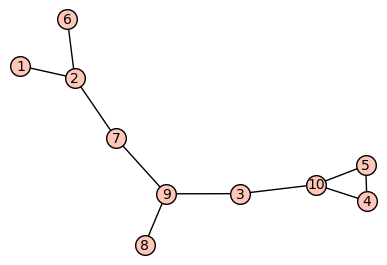

In [37]:
i = randint(1,2)
G = (G_1 if i == 1 else G_2).copy()
pi = Permutations(V).random_element()
G.relabel(pi)
G.show()

Now, the verifier given only G needs to be able to figure out what of the two graphs it is isomorphic to:

In [38]:
j = 1 if G_1.is_isomorphic(G) else 2

Finally, the verifier check that i == j

In [39]:
i == j

True